In [22]:
!pip install alpha_vantage
!pip install xgboost
!pip install pandas_ta==0.3.14b0
!pip install optuna
# First install compatible versions
!pip install --upgrade pyspark==3.3.0 delta-spark==2.2.0
!pip install --upgrade numpy
!pip install --upgrade pandas_ta


In [23]:
import pandas as pd
import numpy as np
# Fix for pandas_ta import issue
np.NaN = np.nan  # Create NaN as an alias to nan
import pandas_ta as ta
import optuna
import logging
from datetime import timedelta

from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

add more data visualizations and insights

            1. open  2. high   3. low  4. close   5. volume
date                                                       
2025-05-13   509.16   517.39  508.420    515.59  53269573.0
2025-05-12   506.99   507.89  501.480    507.85  45090616.0
2025-05-09   490.21   491.54  486.195    487.97  27767416.0
2025-05-08   488.53   492.70  484.170    488.29  39577592.0
2025-05-07   482.08   485.80  476.782    483.30  38109864.0


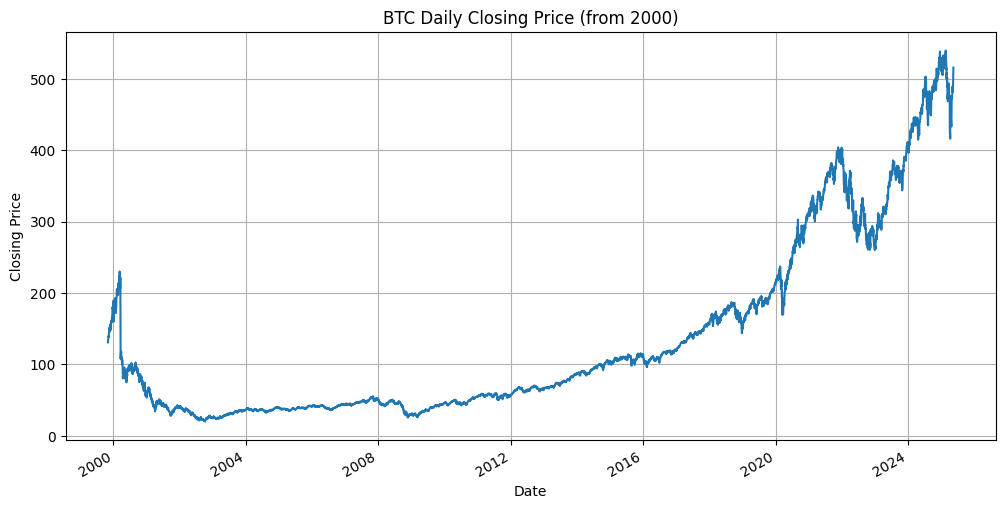

In [24]:


# Step 2: Import libraries
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt

# Step 3: Define your API key and symbol
api_key = 'PH8UF085L5T5MFZN'
symbol = 'QQQ'  # S&P 500 Index

# Step 4: Fetch the data using Alpha Vantage API
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')

# Step 5: Filter data from 2000 onwards
data.index = pd.to_datetime(data.index)
data = data[data.index >= '1900-01-01']

# Step 6: Display and plot the data
print(data.head())
data['4. close'].plot(figsize=(12, 6), title='BTC Daily Closing Price (from 2000)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


In [25]:
# Ensure the column names are correct
data.columns = ['open', 'high', 'low', 'close', 'volume']

In [26]:
data

,open,high,low,close,volume
date,,,,,
2025-05-13,509.16,517.39,508.420,515.59,53269573.0
2025-05-12,506.99,507.89,501.480,507.85,45090616.0
2025-05-09,490.21,491.54,486.195,487.97,27767416.0
2025-05-08,488.53,492.70,484.170,488.29,39577592.0
2025-05-07,482.08,485.80,476.782,483.30,38109864.0
...,...,...,...,...,...
1999-11-05,137.80,138.40,136.400,136.40,7567300.0
1999-11-04,135.40,135.60,133.600,135.00,10024300.0
1999-11-03,132.80,134.30,132.400,133.50,9376300.0


In [27]:
data

,open,high,low,close,volume
date,,,,,
2025-05-13,509.16,517.39,508.420,515.59,53269573.0
2025-05-12,506.99,507.89,501.480,507.85,45090616.0
2025-05-09,490.21,491.54,486.195,487.97,27767416.0
2025-05-08,488.53,492.70,484.170,488.29,39577592.0
2025-05-07,482.08,485.80,476.782,483.30,38109864.0
...,...,...,...,...,...
1999-11-05,137.80,138.40,136.400,136.40,7567300.0
1999-11-04,135.40,135.60,133.600,135.00,10024300.0
1999-11-03,132.80,134.30,132.400,133.50,9376300.0


In [28]:
stockdata = data


stockdata

,open,high,low,close,volume
date,,,,,
2025-05-13,509.16,517.39,508.420,515.59,53269573.0
2025-05-12,506.99,507.89,501.480,507.85,45090616.0
2025-05-09,490.21,491.54,486.195,487.97,27767416.0
2025-05-08,488.53,492.70,484.170,488.29,39577592.0
2025-05-07,482.08,485.80,476.782,483.30,38109864.0
...,...,...,...,...,...
1999-11-05,137.80,138.40,136.400,136.40,7567300.0
1999-11-04,135.40,135.60,133.600,135.00,10024300.0
1999-11-03,132.80,134.30,132.400,133.50,9376300.0


In [29]:
data

,open,high,low,close,volume
date,,,,,
2025-05-13,509.16,517.39,508.420,515.59,53269573.0
2025-05-12,506.99,507.89,501.480,507.85,45090616.0
2025-05-09,490.21,491.54,486.195,487.97,27767416.0
2025-05-08,488.53,492.70,484.170,488.29,39577592.0
2025-05-07,482.08,485.80,476.782,483.30,38109864.0
...,...,...,...,...,...
1999-11-05,137.80,138.40,136.400,136.40,7567300.0
1999-11-04,135.40,135.60,133.600,135.00,10024300.0
1999-11-03,132.80,134.30,132.400,133.50,9376300.0


In [30]:
# ================= TREND INDICATORS =================
stockdata.ta.sma(length=100, append=True)               # Simple Moving Average (SMA) - Average price over a period
stockdata.ta.ema(length=20, append=True)               # Exponential Moving Average (EMA) - Weighted average favoring recent prices
stockdata.ta.wma(length=20, append=True)               # Weighted Moving Average (WMA) - Linear weights on recent prices
stockdata.ta.hma(length=20, append=True)               # Hull Moving Average (HMA) - Reduced lag, smooth trend indicator
stockdata.ta.vwma(length=20, append=True)              # Volume-Weighted Moving Average (VWMA) - Prices weighted by volume
stockdata.ta.macd(fast=12, slow=26, signal=9, append=True)  # Moving Average Convergence Divergence (MACD) - Trend momentum (MACD, MACDh, MACDs)
stockdata.ta.adx(length=14, append=True)               # Average Directional Index (ADX) - Trend strength (ADX, +DI, -DI)
stockdata.ta.cci(length=20, append=True)               # Commodity Channel Index (CCI) - Overbought/oversold levels
stockdata.ta.rsi(length=14, append=True)               # Relative Strength Index (RSI) - Momentum oscillator (0-100)
stockdata.ta.stoch(k=14, d=3, append=True)             # Stochastic Oscillator (STOCH) - Price momentum (K%, D%)
stockdata.ta.ichimoku(tenkan=9, kijun=26, senkou=52, append=True)  # Ichimoku Cloud - Support/resistance, trend, momentum (5 columns)
stockdata.ta.supertrend(length=7, multiplier=3, append=True)  # SuperTrend - Trend direction with ATR volatility (SUPERT, SUPERTd)
stockdata.ta.psar(step=0.02, max_step=0.2, append=True)  # Parabolic SAR (PSAR) - Trailing stop for trends

# ================= MOMENTUM INDICATORS =================
stockdata.ta.mom(length=50, append=True)               # Momentum (MOM) - Price change over period
stockdata.ta.roc(length=10, append=True)               # Rate of Change (ROC) - Percentage price change
stockdata.ta.willr(length=14, append=True)             # Williams %R (WILLR) - Overbought/oversold levels (-0 to -100)
stockdata.ta.uo(append=True)                           # Ultimate Oscillator (UO) - Multi-timeframe momentum
stockdata.ta.ao(fast=5, slow=34, append=True)          # Awesome Oscillator (AO) - Momentum based on 34/5 EMAs
stockdata.ta.kama(length=10, append=True)              # Kaufman's Adaptive MA (KAMA) - Volatility-adjusted moving average
stockdata.ta.cg(length=10, append=True)                # Center of Gravity (CG) - Price cycle indicator

# ================= VOLATILITY INDICATORS =================
stockdata.ta.bbands(length=20, std=2, append=True)     # Bollinger Bands (BBANDS) - Volatility bands (BB_U, BB_M, BB_L)
stockdata.ta.atr(length=14, append=True)               # Average True Range (ATR) - Volatility measure
stockdata.ta.kc(length=20, scalar=2, append=True)      # Keltner Channel (KC) - Volatility bands with ATR (KC_U, KC_M, KC_L)
stockdata.ta.donchian(lower_length=20, upper_length=20, append=True)  # Donchian Channel (DONCHIAN) - Price range channels
stockdata.ta.rvi(length=14, append=True)               # Relative Volatility Index (RVI) - Standard deviation-based oscillator

# ================= VOLUME INDICATORS =================
stockdata.ta.obv(append=True)                          # On-Balance Volume (OBV) - Cumulative volume flow
stockdata.ta.cmf(length=20, append=True)               # Chaikin Money Flow (CMF) - Volume-weighted money flow
stockdata.ta.adosc(fast=3, slow=10, append=True)       # AD Oscillator (ADOSC) - Accumulation/Distribution line oscillator
stockdata.ta.mfi(length=14, append=True)               # Money Flow Index (MFI) - Volume-weighted RSI
stockdata.ta.vwap(append=True)                         # Volume-Weighted Avg Price (VWAP) - Intraday benchmark price
stockdata.ta.eom(length=14, append=True)               # Ease of Movement (EOM) - Price/volume relationship
stockdata.ta.nvi(length=255, append=True)              # Negative Volume Index (NVI) - Smart money indicator

# ================= OTHER INDICATORS =================
stockdata.ta.squeeze(append=True)                      # TTM Squeeze (SQZ) - Bollinger vs Keltner volatility
stockdata.ta.fisher(length=9, append=True)             # Fisher Transform (FISHER) - Normalize prices to Gaussian
stockdata.ta.decay(length=5, mode="linear", append=True)  # Linear/Exponential Decay (DECAY) - Synthetic smoothing
stockdata.ta.decay(length=5, mode="exponential", append=True)  # Linear/Exponential Decay (DECAY) - Synthetic smoothing
stockdata.ta.vortex(length=14, append=True)            # Vortex Indicator (VTX) - Trend reversal detection
stockdata.ta.zscore(length=20, append=True)            # Z-Score (ZSCORE) - Standard deviations from mean
stockdata.ta.entropy(length=10, append=True)           # Entropy (ENTROPY) - Measure of market randomness

<ipython-input-30-71e154bec694>:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.37684148e+10 1.91458755e+10 1.45059687e+10 ... 1.42444008e+09
 1.40324021e+09 6.36578350e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  stockdata.ta.mfi(length=14, append=True)               # Money Flow Index (MFI) - Volume-weighted RSI
<ipython-input-30-71e154bec694>:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.28041281e+10 1.35662802e+10 1.93291682e+10 ... 1.35060735e+09
 1.25079842e+09 8.43674187e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  stockdata.ta.mfi(length=14, append=True)               # Money Flow Index (MFI) - Volume-weighted RSI


[!] VWAP volume series is not datetime ordered. Results may not be as expected.
[!] VWAP price series is not datetime ordered. Results may not be as expected.


<ipython-input-30-71e154bec694>:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stockdata.ta.decay(length=5, mode="linear", append=True)  # Linear/Exponential Decay (DECAY) - Synthetic smoothing
<ipython-input-30-71e154bec694>:44: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  stockdata.ta.decay(length=5, mode="linear", append=True)  # Linear/Exponential Decay (DECAY) - Synthetic smoothing
<ipython-input-30-71e154bec694>:45: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acces

,ENTP_10
date,
2025-05-13,NaN
2025-05-12,NaN
2025-05-09,NaN
2025-05-08,NaN
2025-05-07,NaN
...,...
1999-11-05,3.255427
1999-11-04,3.248765
1999-11-03,3.246073


after engineering move to pyspark, describe in report why

transforming (remove nulls after cuz its about loading the data in first)

In [31]:
import pandas as pd
import numpy as np

def prepare_data_for_ml(stockdata):
    # Make a copy to avoid modifying the original data
    df = stockdata.copy()

    # Calculate mean values for comparison
    atr_mean = df['ATRr_14'].mean()
    vwap_mean = df['VWAP_D'].mean()

    # Create boolean columns for each condition
    df['condition1'] = df['SMA_100'] > df['close']
    df['condition2'] = df['EMA_20'] > df['SMA_100']
    df['condition3'] = df['RSI_14'] > 50
    df['condition4'] = df['ATRr_14'] < atr_mean
    df['condition5'] = df['VWAP_D'] > vwap_mean
    df['condition6'] = df['MOM_50'] > 0

    # Count how many conditions are met (True counts as 1, False as 0)
    df['conditions_met'] = (df['condition1'].astype(int) +
                           df['condition2'].astype(int) +
                           df['condition3'].astype(int) +
                           df['condition4'].astype(int) +
                           df['condition5'].astype(int) +
                           df['condition6'].astype(int))

    # Create our label (0-6) representing how many conditions were met
    df['label'] = df['conditions_met']

    # Drop the individual condition columns if not needed
    df = df.drop(columns=['condition1', 'condition2', 'condition3',
                         'condition4', 'condition5', 'condition6'])

    return df

# Apply the function to your data
final_df = prepare_data_for_ml(stockdata)

# Display the first few rows to verify
print("First 5 rows of final dataframe:")
print(final_df[['close', 'SMA_100', 'EMA_20', 'RSI_14', 'ATRr_14',
                'VWAP_D', 'MOM_50', 'conditions_met', 'label']].head())

# Print label distribution
print("\nLabel Distribution (number of conditions met):")
label_counts = final_df['label'].value_counts().sort_index()
for label, count in label_counts.items():
    print(f"{label} conditions met: {count} records ({count/len(final_df)*100:.2f}%)")

First 5 rows of final dataframe:
             close  SMA_100  EMA_20  RSI_14  ATRr_14      VWAP_D  MOM_50  \
date                                                                       
2025-05-13  515.59      NaN     NaN     NaN      NaN  513.800000     NaN   
2025-05-12  507.85      NaN     NaN     NaN      NaN  505.740000     NaN   
2025-05-09  487.97      NaN     NaN     NaN      NaN  488.568333     NaN   
2025-05-08  488.29      NaN     NaN     NaN      NaN  488.386667     NaN   
2025-05-07  483.30      NaN     NaN     NaN      NaN  481.960667     NaN   

            conditions_met  label  
date                               
2025-05-13               1      1  
2025-05-12               1      1  
2025-05-09               1      1  
2025-05-08               1      1  
2025-05-07               1      1  

Label Distribution (number of conditions met):
1 conditions met: 87 records (1.35%)
2 conditions met: 2909 records (45.30%)
3 conditions met: 2065 records (32.16%)
4 conditions met:

In [32]:
final_df

,open,high,low,close,volume,SMA_100,EMA_20,WMA_20,HMA_20,VWMA_20,...,SQZ_NO,FISHERT_9_1,FISHERTs_9_1,LDECAY_5,VTXP_14,VTXM_14,ZS_20,ENTP_10,conditions_met,label
date,,,,,,,,,,,,,,,,,,,,,
2025-05-13,509.16,517.39,508.420,515.59,53269573.0,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,515.59,NaN,NaN,NaN,NaN,1,1
2025-05-12,506.99,507.89,501.480,507.85,45090616.0,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,515.39,NaN,NaN,NaN,NaN,1,1
2025-05-09,490.21,491.54,486.195,487.97,27767416.0,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,507.65,NaN,NaN,NaN,NaN,1,1
2025-05-08,488.53,492.70,484.170,488.29,39577592.0,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,488.29,NaN,NaN,NaN,NaN,1,1
2025-05-07,482.08,485.80,476.782,483.30,38109864.0,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,488.09,NaN,NaN,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-11-05,137.80,138.40,136.400,136.40,7567300.0,175.8892,147.667407,144.645714,138.400606,148.014544,...,0,-6.079555,-4.558707,138.90,0.541284,1.116208,-1.805374,3.255427,2,2
1999-11-04,135.40,135.60,133.600,135.00,10024300.0,176.1392,146.460987,143.436667,136.793688,146.698941,...,0,-6.839978,-6.079555,136.20,0.577236,1.121951,-1.816798,3.248765,2,2
1999-11-03,132.80,134.30,132.400,133.50,9376300.0,176.3262,145.226608,142.195714,135.189242,145.636285,...,0,-7.220190,-6.839978,134.80,0.554593,1.129983,-1.797806,3.246073,1,1


Store CSV's in delta lake parquet

In [33]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

stockdata.describe()



,open,high,low,close,volume,SMA_100,EMA_20,WMA_20,HMA_20,VWMA_20,...,SQZ_ON,SQZ_OFF,SQZ_NO,FISHERT_9_1,FISHERTs_9_1,LDECAY_5,VTXP_14,VTXM_14,ZS_20,ENTP_10
count,6422.000000,6422.000000,6422.000000,6422.000000,6.422000e+03,6323.000000,6403.000000,6403.000000,6400.000000,6403.000000,...,6422.000000,6422.000000,6422.000000,6414.000000,6413.000000,6422.000000,6408.000000,6408.000000,6403.000000,6404.000000
mean,134.664845,135.754129,133.452800,134.672906,6.808115e+07,131.697855,134.158957,133.983019,133.547194,133.774825,...,0.251946,0.744939,0.003114,-0.403069,-0.401961,135.336857,0.769584,0.841312,-0.311254,3.320003
std,127.367820,128.291256,126.345573,127.395895,1.445639e+08,124.037228,126.756244,126.553209,126.133757,126.375325,...,0.434164,0.435929,0.055723,1.855547,1.853571,128.074952,0.151198,0.139970,1.272241,0.038925
min,19.940000,20.530000,19.760000,20.060000,4.022600e+06,23.603200,21.787992,21.237810,19.816085,21.285193,...,0.000000,0.000000,0.000000,-7.588611,-7.588611,20.160000,0.305215,0.383791,-3.536433,3.127607
25%,42.292500,42.792500,41.875000,42.325000,3.163973e+07,41.608774,42.182079,42.166190,42.316995,42.111892,...,0.000000,0.000000,0.000000,-1.621536,-1.620857,42.480000,0.660901,0.737870,-1.358074,3.298518
50%,76.120000,76.890000,75.390000,76.290000,5.402095e+07,73.300905,76.118501,76.059667,75.483222,75.903507,...,0.000000,1.000000,0.000000,-0.379345,-0.379283,76.635000,0.768609,0.845981,-0.434305,3.315030
75%,180.575000,182.257500,179.060000,180.535000,8.736250e+07,174.899150,181.106595,180.614048,179.069117,179.810409,...,1.000000,1.000000,0.000000,0.910990,0.911502,181.892500,0.883118,0.945371,0.723896,3.335970
max,539.730000,540.810000,536.460000,539.520000,1.097837e+10,513.159800,523.909870,527.664619,544.562734,526.271277,...,1.000000,1.000000,1.000000,6.894304,6.894304,539.520000,1.285732,1.359097,4.048055,3.840178


In [34]:

stockdata_df = final_df.sort_index(ascending=True)

train_size = int(0.6 * len(stockdata_df))
test_size = len(stockdata_df) - train_size # Calculate test size based on train size.

train_data = stockdata_df.iloc[:train_size]   # earlier data for training
test_data = stockdata_df.iloc[train_size:]    # later data for testing

train_data.to_csv("train.csv", index=True) # Keep the index
test_data.to_csv("test.csv", index=True)   # Keep the index

print("Training data saved to train.csv")
print("Testing data saved to test.csv")



Training data saved to train.csv
Testing data saved to test.csv


In [35]:
print("Number of NaN values per column in train_data:")
print(train_data.isnull().sum())

Number of NaN values per column in train_data:
open              0
high              0
low               0
close             0
volume            0
                 ..
VTXM_14           0
ZS_20             0
ENTP_10           0
conditions_met    0
label             0
Length: 73, dtype: int64


In [36]:
from pyspark.sql import SparkSession

# Create a SparkSession
# Add configurations if needed (e.g., memory, cores)
spark = SparkSession.builder.appName("StockDataProcessing").getOrCreate()

In [37]:
# "# Load data from CSV into a PySpark DataFrame
# train_spark_df = spark.read.csv("train.csv", header=True, inferSchema=True)
# test_spark_df = spark.read.csv("test.csv", header=True, inferSchema=True)

# # Show schema to verify data types
# train_spark_df.printSchema()
# test_spark_df.printSchema()

# # Show first few rows
# train_spark_df.show(5)
# test_spark_df.show(5)"

removing rows or mean imputation without a rolling window is not smart because of the timeseries nature of stocks, it would ruin indications of growing or shrinking trends in price


In [38]:
import pandas as pd

def fill_nan_with_rolling_median(df, window_size=21): # Use an odd window size to center
    if window_size % 2 == 0:
        window_size += 1
    if window_size < 3:
        window_size = 3

    center_offset = (window_size - 1) // 2
    df_filled = df.apply(lambda col: col.fillna(col.rolling(window=window_size, center=True).median()))


    df_filled = df_filled.fillna(df_filled.median())

    return df_filled

train_data_filled = fill_nan_with_rolling_median(train_data.copy(), window_size=21)
test_data_filled = fill_nan_with_rolling_median(test_data.copy(), window_size=21)

print("NaN counts in train_data_filled after rolling median imputation:")
print(train_data_filled.isnull().sum())

print("\nNaN counts in test_data_filled after rolling median imputation:")
print(test_data_filled.isnull().sum())

# Now you can save these filled dataframes to CSVs and load them into PySpark
train_data_filled.to_csv("train_filled.csv", index=True)
test_data_filled.to_csv("test_filled.csv", index=True)

# Load filled data from CSV into PySpark DataFrame
train_spark_df = spark.read.csv("train_filled.csv", header=True, inferSchema=True)
test_spark_df = spark.read.csv("test_filled.csv", header=True, inferSchema=True)

# Show schema to verify data types
train_spark_df.printSchema()
test_spark_df.printSchema()

# Show first few rows
train_spark_df.show(5)
test_spark_df.show(5)

NaN counts in train_data_filled after rolling median imputation:
open              0
high              0
low               0
close             0
volume            0
                 ..
VTXM_14           0
ZS_20             0
ENTP_10           0
conditions_met    0
label             0
Length: 73, dtype: int64

NaN counts in test_data_filled after rolling median imputation:
open              0
high              0
low               0
close             0
volume            0
                 ..
VTXM_14           0
ZS_20             0
ENTP_10           0
conditions_met    0
label             0
Length: 73, dtype: int64
root
 |-- date: timestamp (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: double (nullable = true)
 |-- SMA_100: double (nullable = true)
 |-- EMA_20: double (nullable = true)
 |-- WMA_20: double (nullable = true)
 |-- HMA_20: double (nullable = true)
 

move from SKLEARN to pysparkML

In [40]:
train_spark_df.printSchema()
test_spark_df.printSchema()

root
 |-- date: timestamp (nullable = true)
 |-- open: double (nullable = true)
 |-- high: double (nullable = true)
 |-- low: double (nullable = true)
 |-- close: double (nullable = true)
 |-- volume: double (nullable = true)
 |-- SMA_100: double (nullable = true)
 |-- EMA_20: double (nullable = true)
 |-- WMA_20: double (nullable = true)
 |-- HMA_20: double (nullable = true)
 |-- VWMA_20: double (nullable = true)
 |-- MACD_12_26_9: double (nullable = true)
 |-- MACDh_12_26_9: double (nullable = true)
 |-- MACDs_12_26_9: double (nullable = true)
 |-- ADX_14: double (nullable = true)
 |-- DMP_14: double (nullable = true)
 |-- DMN_14: double (nullable = true)
 |-- CCI_20_0.015: double (nullable = true)
 |-- RSI_14: double (nullable = true)
 |-- STOCHk_14_3_3: double (nullable = true)
 |-- STOCHd_14_3_3: double (nullable = true)
 |-- ISA_9: double (nullable = true)
 |-- ISB_26: double (nullable = true)
 |-- ITS_9: double (nullable = true)
 |-- IKS_26: double (nullable = true)
 |-- ICS_26:

In [46]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import col

# Create a mapping of old column names to new, period-free names
column_mapping = {
    'CCI_20_0.015': 'CCI_20_0_015',
    'STOCHk_14_3_3': 'STOCHk_14_3_3',
    'STOCHd_14_3_3': 'STOCHd_14_3_3',
    'SUPERT_7_3.0': 'SUPERT_7_3_0',
    'SUPERTd_7_3.0': 'SUPERTd_7_3_0',
    'SUPERTl_7_3.0': 'SUPERTl_7_3_0',
    'SUPERTs_7_3.0': 'SUPERTs_7_3_0',
    'PSARl_0.02_0.2': 'PSARl_0_02_0_2',
    'PSARs_0.02_0.2': 'PSARs_0_02_0_2',
    'PSARaf_0.02_0.2': 'PSARaf_0_02_0_2',
    'PSARr_0.02_0.2': 'PSARr_0_02_0_2',
    'UO_7_14_28': 'UO_7_14_28',
    'KAMA_10_2_30': 'KAMA_10_2_30',
    'BBL_20_2.0': 'BBL_20_2_0',
    'BBM_20_2.0': 'BBM_20_2_0',
    'BBU_20_2.0': 'BBU_20_2_0',
    'BBB_20_2.0': 'BBB_20_2_0',
    'BBP_20_2.0': 'BBP_20_2_0',
    'KCLe_20_2.0': 'KCLe_20_2_0',
    'KCBe_20_2.0': 'KCBe_20_2_0',
    'KCUe_20_2.0': 'KCUe_20_2_0',
    'DCL_20_20': 'DCL_20_20',
    'DCM_20_20': 'DCM_20_20',
    'DCU_20_20': 'DCU_20_20',
    'ADOSC_3_10': 'ADOSC_3_10',
    'EOM_14_100000000': 'EOM_14_100000000',
    'SQZ_20_2.0_20_1.5': 'SQZ_20_2_0_20_1_5',
    'FISHERT_9_1': 'FISHERT_9_1',
    'FISHERTs_9_1': 'FISHERTs_9_1'
    # Add any other columns with periods if the issue persists
}

# Rename the columns in both DataFrames
for old_name, new_name in column_mapping.items():
    train_spark_df = train_spark_df.withColumnRenamed(old_name, new_name)
    test_spark_df = test_spark_df.withColumnRenamed(old_name, new_name)

# Define the feature columns using the new names
feature_columns_new = [
    'open', 'high', 'low', 'close', 'volume', 'SMA_100', 'EMA_20', 'WMA_20', 'HMA_20',
    'VWMA_20', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'ADX_14', 'DMP_14',
    'DMN_14', 'CCI_20_0_015', 'RSI_14', 'STOCHk_14_3_3', 'STOCHd_14_3_3', 'ISA_9',
    'ISB_26', 'ITS_9', 'IKS_26', 'ICS_26', 'SUPERT_7_3_0', 'SUPERTd_7_3_0',
    'SUPERTl_7_3_0', 'SUPERTs_7_3_0', 'PSARl_0_02_0_2', 'PSARs_0_02_0_2',
    'PSARaf_0_02_0_2', 'PSARr_0_02_0_2', 'MOM_50', 'ROC_10', 'WILLR_14', 'UO_7_14_28',
    'AO_5_34', 'KAMA_10_2_30', 'CG_10', 'BBL_20_2_0', 'BBM_20_2_0', 'BBU_20_2_0',
    'BBB_20_2_0', 'BBP_20_2_0', 'ATRr_14', 'KCLe_20_2_0', 'KCBe_20_2_0', 'KCUe_20_2_0',
    'DCL_20_20', 'DCM_20_20', 'DCU_20_20', 'RVI_14', 'OBV', 'CMF_20', 'ADOSC_3_10',
    'MFI_14', 'VWAP_D', 'EOM_14_100000000', 'NVI_255', 'SQZ_20_2_0_20_1_5',
    'SQZ_ON', 'SQZ_OFF', 'SQZ_NO', 'FISHERT_9_1', 'FISHERTs_9_1', 'LDECAY_5', 'VTXP_14',
    'VTXM_14', 'ZS_20', 'ENTP_10'
]

# Create the VectorAssembler with the new column names
assembler = VectorAssembler(inputCols=feature_columns_new, outputCol="features")

# Transform the renamed DataFrames
train_assembled = assembler.transform(train_spark_df)
test_assembled = assembler.transform(test_spark_df)

# Select the features and label columns
train_data_mllib = train_assembled.select("features", "label")
test_data_mllib = test_assembled.select("features", "label")

print("Transformed training data with feature vector (after renaming columns):")
train_data_mllib.show(5)

print("\nTransformed testing data with feature vector (after renaming columns):")
test_data_mllib.show(5)

Transformed training data with feature vector (after renaming columns):
+--------------------+-----+
|            features|label|
+--------------------+-----+
|[131.5,133.1,130....|    1|
|[131.5,133.1,130....|    1|
|[132.8,134.3,132....|    1|
|[135.4,135.6,133....|    2|
|[137.8,138.4,136....|    2|
+--------------------+-----+
only showing top 5 rows


Transformed testing data with feature vector (after renaming columns):
+--------------------+-----+
|            features|label|
+--------------------+-----+
|[108.44,108.94,10...|    3|
|[108.84,108.91,10...|    4|
|[108.61,109.42,10...|    3|
|[109.05,109.16,10...|    3|
|[108.51,108.67,10...|    3|
+--------------------+-----+
only showing top 5 rows



In [47]:
from pyspark.ml.classification import RandomForestClassifier

# Define the Random Forest Classifier with hyperparameters
rf_classifier_mllib = RandomForestClassifier(
    featuresCol="features",
    labelCol="label",
    numTrees=200,             # Equivalent to n_estimators
    maxDepth=10,             # Equivalent to max_depth
    minInstancesPerNode=5,    # Similar to min_samples_split
    minInfoGain=0.0,          # Minimum information gain for a split
    maxBins=32,              # Number of bins for discretizing continuous features
    impurity='gini',          # Split criterion ('gini' or 'entropy')
    featureSubsetStrategy='sqrt', # Equivalent to max_features
    seed=42,
    cacheNodeIds=True,
    checkpointInterval=10
)

# Train the model
rf_model_mllib = rf_classifier_mllib.fit(train_data_mllib)



+--------------------+-----+----------+
|            features|label|prediction|
+--------------------+-----+----------+
|[108.44,108.94,10...|    3|       3.0|
|[108.84,108.91,10...|    4|       3.0|
|[108.61,109.42,10...|    3|       4.0|
|[109.05,109.16,10...|    3|       3.0|
|[108.51,108.67,10...|    3|       3.0|
|[108.73,108.965,1...|    2|       3.0|
|[108.5,108.71,107...|    3|       3.0|
|[107.63,107.9857,...|    3|       3.0|
|[106.95,106.98,10...|    2|       2.0|
|[105.875,106.01,1...|    2|       2.0|
+--------------------+-----+----------+
only showing top 10 rows



+--------------------+-----+----------+
|            features|label|prediction|
+--------------------+-----+----------+
|[108.44,108.94,10...|    3|       3.0|
|[108.84,108.91,10...|    4|       3.0|
|[108.61,109.42,10...|    3|       4.0|
|[109.05,109.16,10...|    3|       3.0|
|[108.51,108.67,10...|    3|       3.0|
|[108.73,108.965,1...|    2|       3.0|
|[108.5,108.71,107...|    3|       3.0|
|[107.63,107.9857,...|    3|       3.0|
|[106.95,106.98,10...|    2|       2.0|
|[105.875,106.01,1...|    2|       2.0|
+--------------------+-----+----------+
only showing top 10 rows



To-Do List Summary:
Data Preparation:

Gather data (price, volatility, trend indicators, etc.) for the last 30 years.

Split data into training (1985-2015), validation (2016-2018), and test (2019-2024) datasets.

Load and preprocess data (handle missing values, normalize, etc.).


after feature engineering move to SPARK

Model Training:

Split the training data using K-purged cross-validation.

Train your model (XGBoost or another model) on the training set.

Hyperparameter Tuning:

Use Optuna to tune hyperparameters on the training data.

Re-train the model with the optimized hyperparameters.

Walk-Forward Testing:

Test the model in a walk-forward manner on your test data (e.g., 5-year horizon).

Model Evaluation:

Evaluate the model’s performance using metrics like accuracy, precision, recall, and compare with the benchmark.

Final Testing:

Test on the full test dataset (2021-2024).

Compare performance with the benchmark index (S&P 500 or equivalent).

Benchmark Comparison:

Compare model performance with a benchmark index using performance metrics like Sharpe ratio, drawdown, and cumulative returns.
